In [1]:
# Principal Component Alogrithm using for face recognition on SciKitLearn 'Labeled Faces in the Wild' dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
# Import dataset
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.keys())
print(faces.target_names)
print(faces.images.shape)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [7]:
# PCA training
from sklearn.decomposition import PCA

pca = PCA(150, # 150 principal components
          svd_solver='randomized', # because the set is large, I use a hyperparameter solver with the “randomize” method to approximate the first N principal components - this increases speed at the expense of accuracy
          random_state=42) 
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

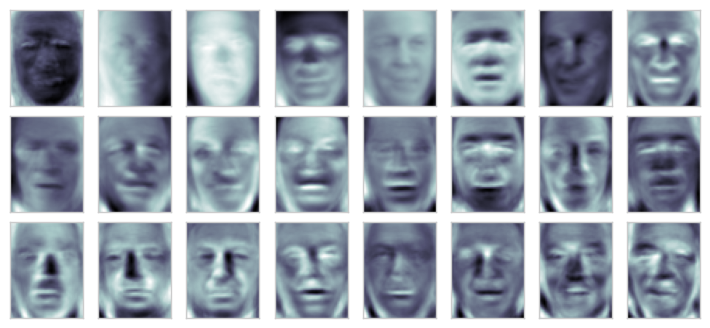

In [9]:
# Visualization of images represented by the first few principal components
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone') #eigenvectors
    

Text(0, 0.5, 'Cumulative amount of explained variance')

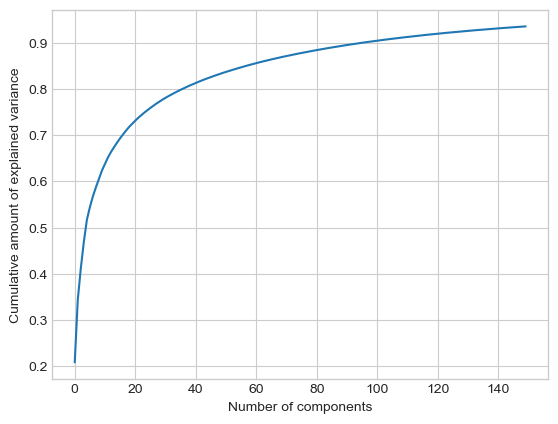

In [11]:
# # Selection of the number of components by the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative amount of explained variance")

In [13]:
# 150 principal components account for over 90% of the variance. 
# This means that it is possible to recover most of the data features.

In [15]:
# Image reconstruction based on 150 principal components
pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, 'Image based\n on 150\nprincipal components')

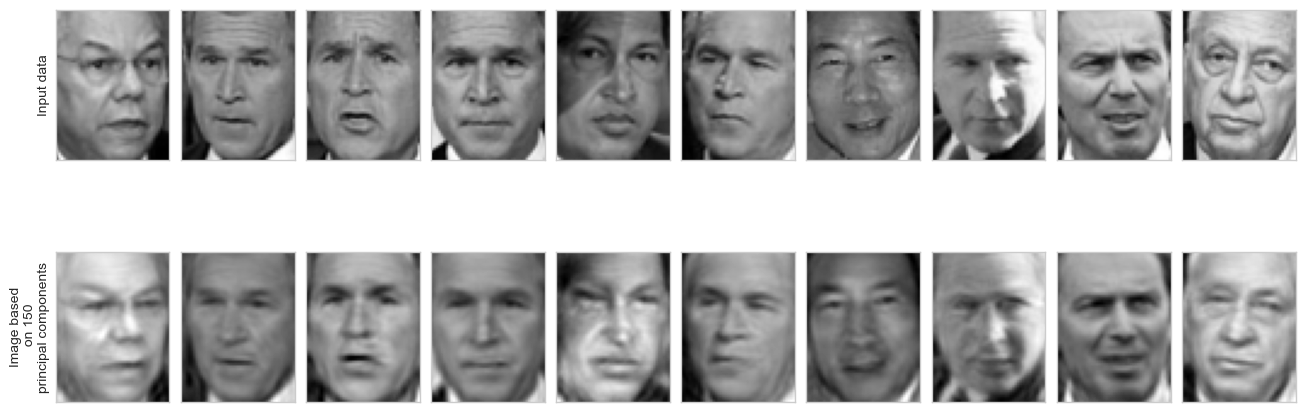

In [17]:
# Visualization of the results
fig, ax = plt.subplots(2, 10, figsize=(16,6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap='binary_r')

ax[0, 0].set_ylabel('Input data')
ax[1, 0].set_ylabel('Image based\n on 150\nprincipal components')

In [19]:
# The top row shows the input images.
# The bottom row shows their reconstruction based on 150 of approximately 1348 features, which gives very good results.
# This means that, for example, a classification algorithm can be trained on 150-dimensional data, 
# which can lead to much more efficient classification.